## City Year All Handles -- See images of the  top favorited and retweeted posts, and see the pattern over time of when city year handles are sending posts


In [174]:

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import re

In [175]:

allDF = pd.read_csv ("tweets_until_late_Sept.csv") 
#see squlite and twitter api python code from curiositybits.com


In [176]:
newDF = allDF


In [177]:

#get rid of retweets, ie leave in null retweets, then drop that column

newDF = allDF[allDF["retweeted_status"].isnull()] #.dropna(axis=1)



In [178]:

columns = ['query','rowid','user_type','inserted_date','truncated','language','possibly_sensitive','withheld_in_countries',
 'withheld_scope','from_user_screen_name',
 'from_user_followers_count',
 'from_user_friends_count',
 'from_user_listed_count',
 'from_user_favourites_count',
 'from_user_statuses_count',
 'from_user_description',
 'from_user_location',
 'from_user_created_at',
'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'source',
 'entities_expanded_urls',
 'json_output',
 'entities_media_count',
'entities_urls',
 'entities_urls_count',
 'entities_hashtags',
 'entities_hashtags_count',
 'entities_mentions',
 'entities_mentions_count',
 'created_at',
'num_characters',
 'num_words',
'coordinates',
'retweeted_status']
newDF.drop(columns, inplace=True, axis=1)



In [179]:
mostRetweets = newDF.sort_values(by="retweet_count",ascending=False)
#mostRetweets.head(10)

In [180]:
mostFavorite = newDF.sort_values(by="favorite_count",ascending=False)
#mostFavorite.head(100)


In [181]:
topFav20 = mostFavorite.head(20)
topRetweet20 = mostRetweets.head(20)

In [182]:
tops = pd.merge(topFav20, topRetweet20, how='inner', on=['favorite_count', 'retweet_count'])
#print(tops.content_x)

In [183]:
#THUMBNAILS 
import glob, os 
size = 384, 384

for infile in glob.glob("*.png"): 
    file, ext = os.path.splitext(infile) 
    im = Image.open(infile) 
    im.thumbnail(size) 
    im.save(file + ".thumbnail", "png")
    

# What did the of top city year most liked and most favorited tweets look like

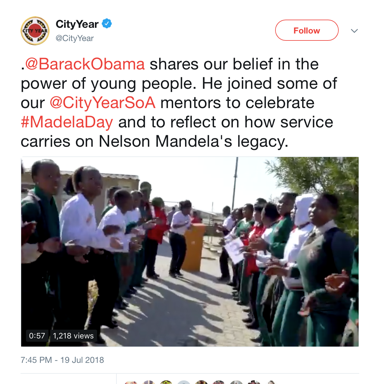

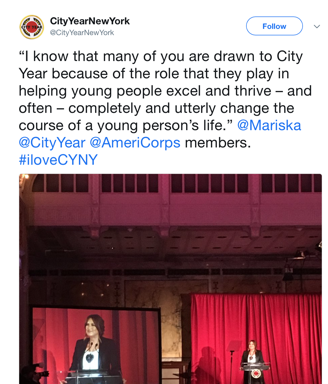

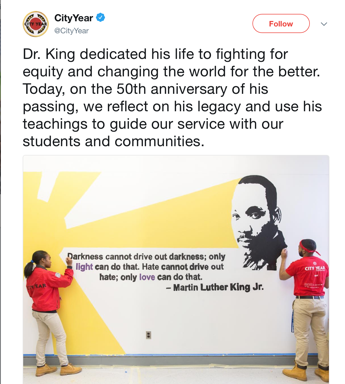

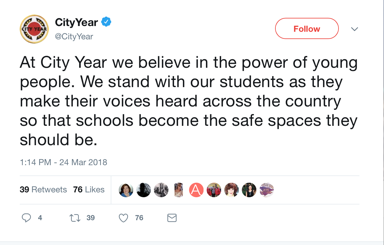

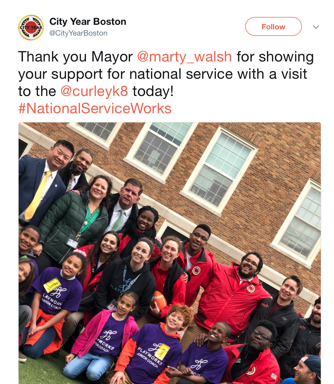

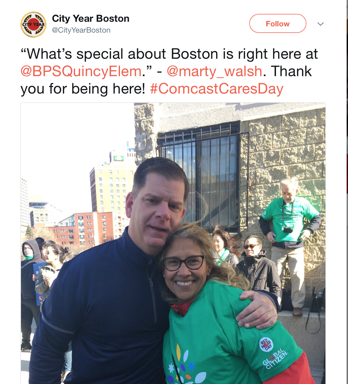

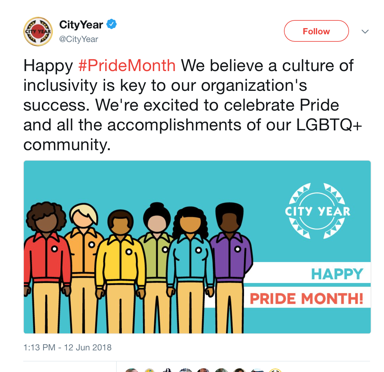

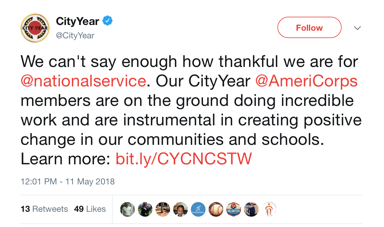

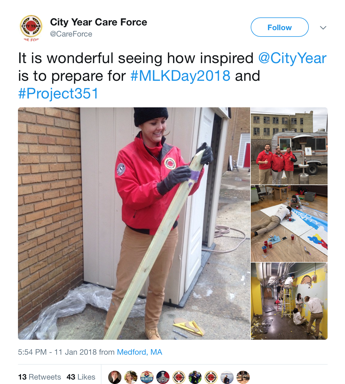

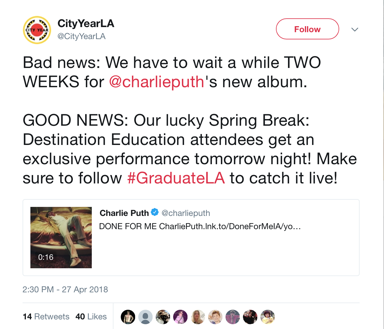

In [184]:
listOfThumbnails = ['images/top1.thumbnail', 'images/top2.thumbnail', 'images/top3.thumbnail', 'images/top4.thumbnail', 'images/top5.thumbnail', 'images/top6.thumbnail', 'images/top7.thumbnail', 'images/top8.thumbnail', 'images/top9.thumbnail', 'images/top10.thumbnail',]
for imageName in listOfThumbnails: 
    pic =(Image.open(imageName)) 
    display(pic)

In [185]:
timestamps = pd.to_datetime(newDF['created_at_text'], errors='coerce')

In [186]:
newDF["timestamp"] = pd.Series(timestamps, index = allDF.index)  



/Users/hw/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
newDF.groupby(['timestamp', 'tweet_id']).size().head(1)

timestamp            tweet_id          
2014-04-21 20:43:05  458345198074871808    1
dtype: int64

In [188]:
max(newDF.timestamp)

Timestamp('2018-09-25 17:33:23')

In [189]:
time = newDF


In [190]:

del time['content']

In [191]:
time.index = time['timestamp']

In [192]:
del time['timestamp']

In [194]:
CityTweetsOverTime = time.groupby(level=0).count()

## CITY YEAR HANDLES --  WHEN IS CONTENT BEING SENT?

In [204]:
#df1 = df[['a','d']]
CityTweetsOverTime = CityTweetsOverTime[["tweet_id"]]

##  Totals by Day -- city year handles have sent upwards of 80 posts on a busy day

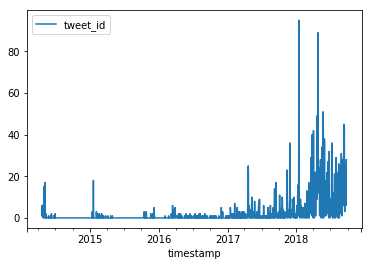

In [197]:
CityTweetsOverTime.resample('D').sum().plot()

## CITY YEAR TWEETS BY MONTHS - handles have sent as many as 500+ tweets in one month 

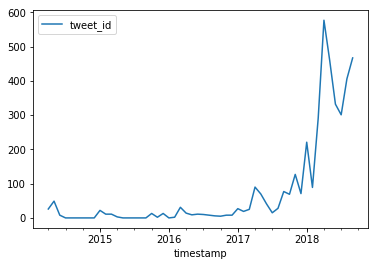

In [198]:

CityTweetsOverTime.resample('M').sum().plot()

In [205]:
#Monday is 0 and Sunday is 6.
#CityTweetsOverTime.groupby(CityTweetsOverTime.index.dayofweek)['tweet_id'].sum()

## TWEETS BY DAY OF WEEK, 0 IS MONDAY 6 IS SUNDAY
## CITY POSTS ALOT ON MONDAY

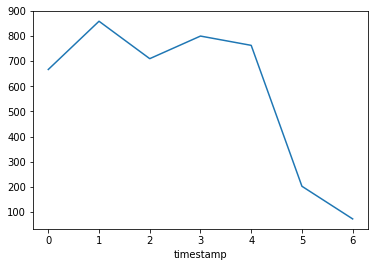

In [206]:
#Return the day of the week as an integer, where Monday is 0 and Sunday is 6.
CityTweetsOverTime.groupby(CityTweetsOverTime.index.dayofweek)['tweet_id'].sum().plot()

## CITY YEAR TWEETS BY HOUR OF THE DAY - 24 HOUR CLOCK - city posts a lot in the afternoon and into evening

In [207]:
#CityTweetsOverTime.groupby(CityTweetsOverTime.index.hour)['tweet_id'].sum()

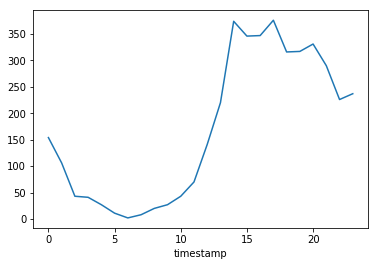

In [208]:
CityTweetsOverTime.groupby(CityTweetsOverTime.index.hour)['tweet_id'].sum().plot()

## TWEETS BY MONTH,  LOTS OF TWEETS IN APRIL, LESS  IN THE SUMMER AND THEN PICKS UP IN SEPTEMBER

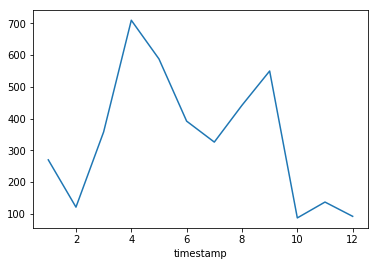

In [203]:
CityTweetsOverTime.groupby(CityTweetsOverTime.index.month)['tweet_id'].sum().plot()